Reference
1. https://www.kaggle.com/arpandas65/covid-19-projection-using-lstm
2. Code - https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
3. Code - https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
4. Analysis over performance - https://machinelearningmastery.com/diagnose-overfitting-underfitting-lstm-models/
5. Metrics to be added - https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/
6. Univariate LSTM forecasting - https://www.youtube.com/watch?v=UbvkhuqVqUI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import math
from sklearn.metrics import r2_score
np.random.seed(57)

In [2]:
df = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise_daily.csv")

In [3]:
df.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [4]:
conf_df = df[df['Status'] == 'Confirmed']
rec_df = df[df['Status'] == 'Recovered']
dec_df = df[df['Status'] == 'Deceased']

In [5]:
conf_df.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
1713,06-Oct-21,2021-10-06,Confirmed,22605,1,800,41,300,2,5,...,30,4,24,1432,187,12,9,22,786,0
1716,07-Oct-21,2021-10-07,Confirmed,21474,2,643,32,295,4,16,...,23,2,18,1390,176,7,15,8,771,0
1719,08-Oct-21,2021-10-08,Confirmed,19868,0,693,21,318,4,5,...,16,5,33,1359,201,12,11,19,784,0
1722,09-Oct-21,2021-10-09,Confirmed,17941,3,629,16,273,4,4,...,28,1,18,1344,190,14,10,17,776,0
1725,10-Oct-21,2021-10-10,Confirmed,19020,1,624,19,160,9,2,...,27,4,13,1329,162,19,26,6,760,0


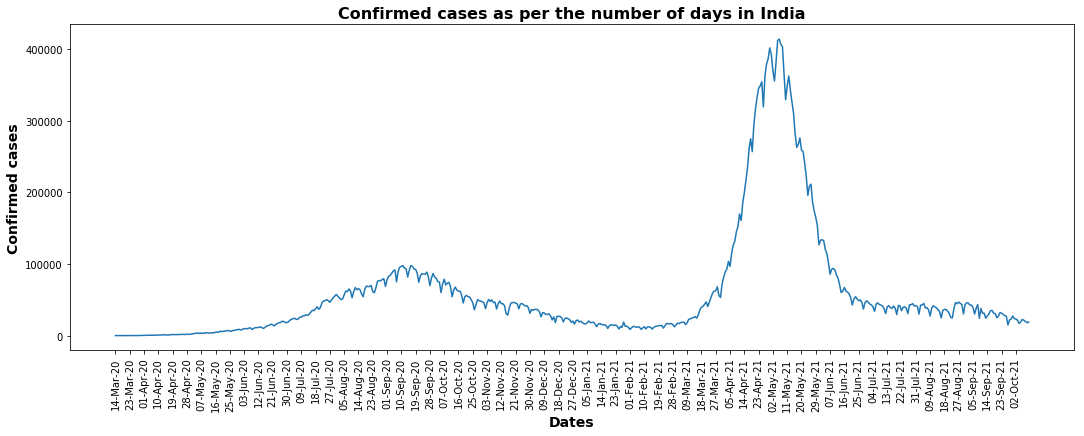

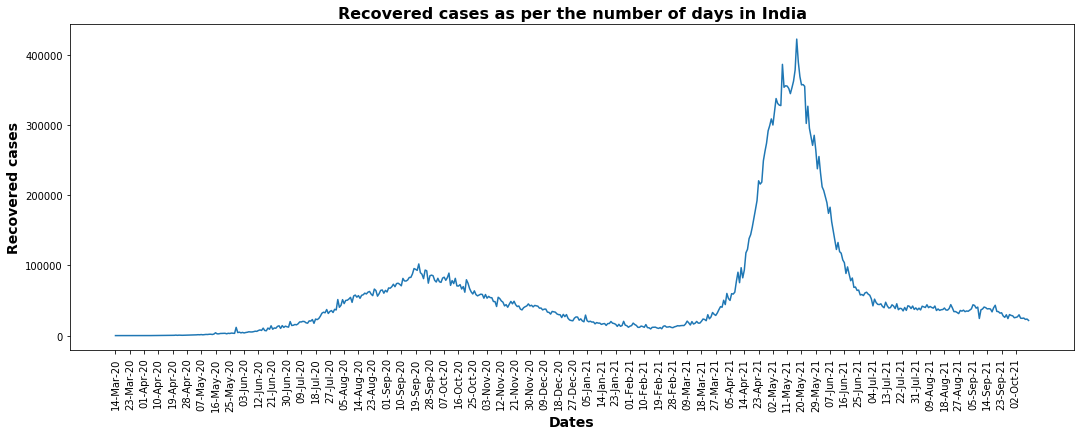

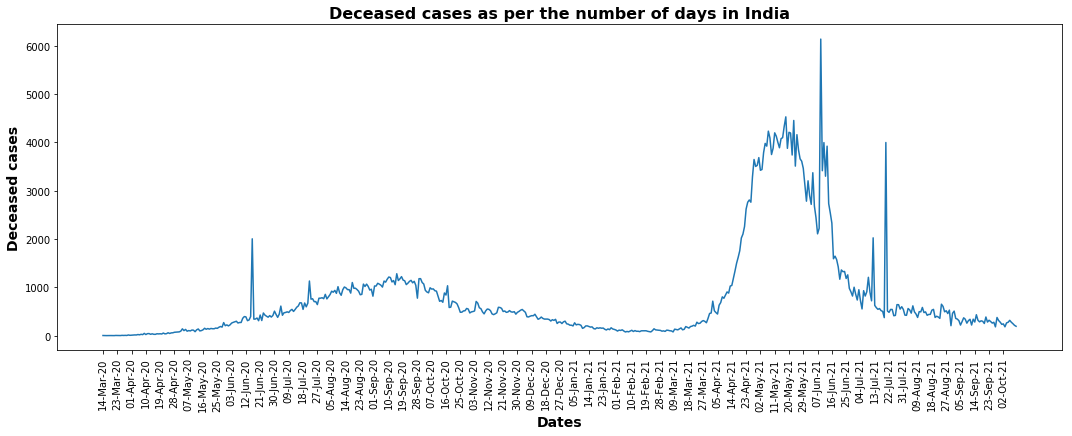

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(conf_df['Date'], conf_df['TT'])
plt.xlabel('Dates', weight='bold', fontsize=14)
plt.ylabel('Confirmed cases', weight='bold', fontsize=14)
plt.title('Confirmed cases as per the number of days in India', weight='bold', fontsize=16)
plt.xticks(np.arange(0, len(conf_df['Date']), 9), rotation='vertical')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(rec_df['Date'], rec_df['TT'])
plt.xlabel('Dates', weight='bold', fontsize=14)
plt.ylabel('Recovered cases', weight='bold', fontsize=14)
plt.title('Recovered cases as per the number of days in India', weight='bold', fontsize=16)
plt.xticks(np.arange(0, len(rec_df['Date']), 9), rotation='vertical')
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(dec_df['Date'], dec_df['TT'])
plt.xlabel('Dates', weight='bold', fontsize=14)
plt.ylabel('Deceased cases', weight='bold', fontsize=14)
plt.title('Deceased cases as per the number of days in India', weight='bold', fontsize=16)
plt.xticks(np.arange(0, len(dec_df['Date']), 9), rotation='vertical')
plt.show()

##### Custom Neural Network - Only for testing purpose. (Didn't performed well)
```
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
input_layer = Input(shape=(1, look_back), dtype='float32')
dense1 = Dense(60, activation='linear')(input_layer)
dense2 = Dense(60, activation='linear')(dense1)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2, validation_split=0.10)
```

# confirmed cases

518 58
Epoch 1/150
8/8 - 1s - loss: 0.7400 - accuracy: 0.0000e+00 - val_loss: 0.6679 - val_accuracy: 0.0000e+00
Epoch 2/150
8/8 - 0s - loss: 0.6458 - accuracy: 0.0000e+00 - val_loss: 0.5761 - val_accuracy: 0.0000e+00
Epoch 3/150
8/8 - 0s - loss: 0.5597 - accuracy: 0.0000e+00 - val_loss: 0.4921 - val_accuracy: 0.0000e+00
Epoch 4/150
8/8 - 0s - loss: 0.4809 - accuracy: 0.0000e+00 - val_loss: 0.4142 - val_accuracy: 0.0000e+00
Epoch 5/150
8/8 - 0s - loss: 0.4075 - accuracy: 0.0000e+00 - val_loss: 0.3420 - val_accuracy: 0.0000e+00
Epoch 6/150
8/8 - 0s - loss: 0.3390 - accuracy: 0.0000e+00 - val_loss: 0.2747 - val_accuracy: 0.0000e+00
Epoch 7/150
8/8 - 0s - loss: 0.2762 - accuracy: 0.0000e+00 - val_loss: 0.2123 - val_accuracy: 0.0000e+00
Epoch 8/150
8/8 - 0s - loss: 0.2172 - accuracy: 0.0000e+00 - val_loss: 0.1570 - val_accuracy: 0.0000e+00
Epoch 9/150
8/8 - 0s - loss: 0.1662 - accuracy: 0.0000e+00 - val_loss: 0.1091 - val_accuracy: 0.0000e+00
Epoch 10/150
8/8 - 0s - loss: 0.1226 - accuracy:

8/8 - 0s - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 4.9534e-04 - val_accuracy: 0.0000e+00
Epoch 77/150
8/8 - 0s - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 5.0925e-04 - val_accuracy: 0.0000e+00
Epoch 78/150
8/8 - 0s - loss: 0.0064 - accuracy: 0.0000e+00 - val_loss: 5.0548e-04 - val_accuracy: 0.0000e+00
Epoch 79/150
8/8 - 0s - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 4.9779e-04 - val_accuracy: 0.0000e+00
Epoch 80/150
8/8 - 0s - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 5.0317e-04 - val_accuracy: 0.0000e+00
Epoch 81/150
8/8 - 0s - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 4.9628e-04 - val_accuracy: 0.0000e+00
Epoch 82/150
8/8 - 0s - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 5.0012e-04 - val_accuracy: 0.0000e+00
Epoch 83/150
8/8 - 0s - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 5.1326e-04 - val_accuracy: 0.0000e+00
Epoch 84/150
8/8 - 0s - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 5.0263e-04 - val_accuracy: 0.0000e+00
Epoch 85/150
8/8 - 0s -

Train Score: 12529.15 RMSE
Test Score: 5741.77 RMSE
Train Score: 156979544.45 MSE
Test Score: 32967976.00 MSE
Train Score: 0.48 MSLE
Test Score: 0.04 MSLE
Train Score: 0.70 RMSLE
Test Score: 0.19 RMSLE
Train Score: 7242.42 MAE
Test Score: 4291.49 MAE


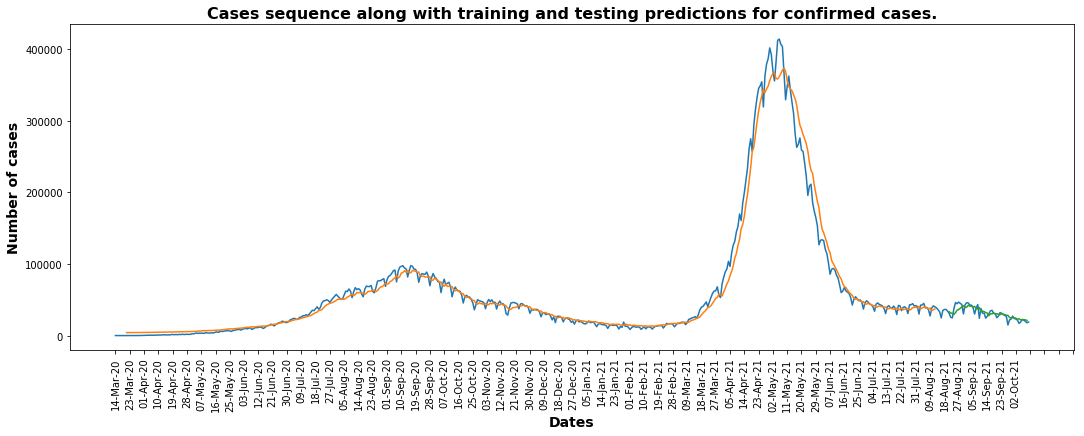

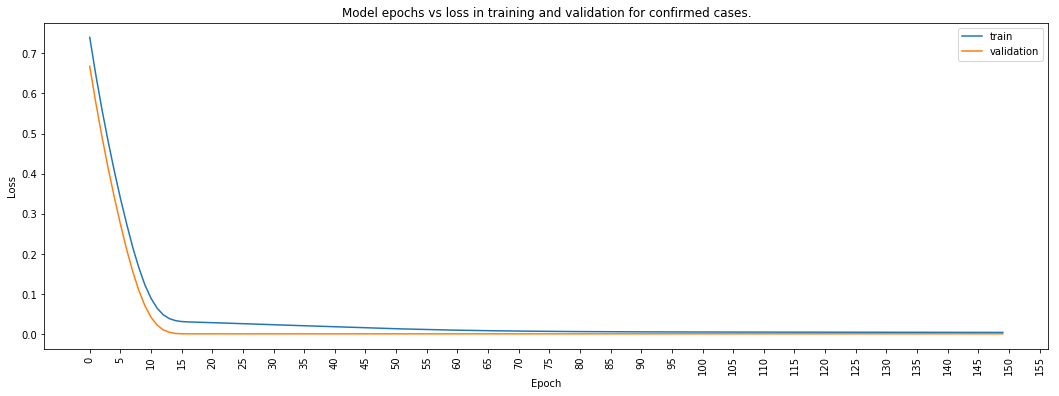

In [7]:
# Change conf to any other and column name as per requirement.
dataframe = conf_df['TT']   # Only change the TT to as per state, 
#and rest everything will work. So only one change and rest of the program is done.

#print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = dataset[:,np.newaxis]

scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.90) # train test split
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
look_back = 7 # 7 was used; This is hyperparameter *1 is optimal 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(7, input_shape=(1, look_back))) # neurons increased now!
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=150, batch_size=64, verbose=2, validation_split=0.10)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# calculate Mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

# calculate bias
forecast_errors = [trainY[i] - trainPredict[i, 0] for i in range(len(trainY))]
bias = sum(forecast_errors) * 1.0/len(trainY)
#print('Train Bias: {} '.format(bias))
forecast_errors = [testY[i] - testPredict[i, 0] for i in range(len(testY))]
bias = sum(forecast_errors) * 1.0/len(testY)
#print('Test Bias: {} '.format(bias))

# calculate Root Mean Squared Error
trainScore = mean_squared_log_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSLE' % (trainScore))
testScore = mean_squared_log_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSLE' % (testScore))

# calculate Root Mean Squared Log error
trainScore = math.sqrt(mean_squared_log_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSLE' % (trainScore))
testScore = math.sqrt(mean_squared_log_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSLE' % (testScore))

# calculate Mean absolute error
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(18, 6))
plt.plot(conf_df['Date'], scaler.inverse_transform(dataset) )
plt.plot(conf_df['Date'], trainPredictPlot)
plt.plot(conf_df['Date'], testPredictPlot)
plt.xlabel('Dates', weight='bold', fontsize=14)
plt.ylabel('Number of cases', weight='bold', fontsize=14)
plt.title('Cases sequence along with training and testing predictions for confirmed cases.', weight='bold', fontsize=16)
plt.xticks(np.arange(0, len(trainPredictPlot)+30, 9), rotation='vertical')
plt.show()
from matplotlib import pyplot
pyplot.figure(figsize=(18, 6))
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model epochs vs loss in training and validation for confirmed cases.')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
plt.xticks(np.arange(0, len(history.history['loss'])+10, 5), rotation='vertical')
#plt.yticks([dataframe.min(), dataframe.max])
pyplot.show()

# recovered cases

518 58
Epoch 1/150
8/8 - 1s - loss: 0.3246 - accuracy: 0.0000e+00 - val_loss: 0.2676 - val_accuracy: 0.0000e+00
Epoch 2/150
8/8 - 0s - loss: 0.2669 - accuracy: 0.0000e+00 - val_loss: 0.2119 - val_accuracy: 0.0000e+00
Epoch 3/150
8/8 - 0s - loss: 0.2123 - accuracy: 0.0000e+00 - val_loss: 0.1609 - val_accuracy: 0.0000e+00
Epoch 4/150
8/8 - 0s - loss: 0.1635 - accuracy: 0.0000e+00 - val_loss: 0.1162 - val_accuracy: 0.0000e+00
Epoch 5/150
8/8 - 0s - loss: 0.1208 - accuracy: 0.0000e+00 - val_loss: 0.0791 - val_accuracy: 0.0000e+00
Epoch 6/150
8/8 - 0s - loss: 0.0863 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 7/150
8/8 - 0s - loss: 0.0597 - accuracy: 0.0000e+00 - val_loss: 0.0281 - val_accuracy: 0.0000e+00
Epoch 8/150
8/8 - 0s - loss: 0.0408 - accuracy: 0.0000e+00 - val_loss: 0.0141 - val_accuracy: 0.0000e+00
Epoch 9/150
8/8 - 0s - loss: 0.0294 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 10/150
8/8 - 0s - loss: 0.0231 - accuracy:

Epoch 76/150
8/8 - 0s - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 4.3563e-04 - val_accuracy: 0.0000e+00
Epoch 77/150
8/8 - 0s - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 4.3300e-04 - val_accuracy: 0.0000e+00
Epoch 78/150
8/8 - 0s - loss: 0.0075 - accuracy: 0.0022 - val_loss: 4.3416e-04 - val_accuracy: 0.0000e+00
Epoch 79/150
8/8 - 0s - loss: 0.0074 - accuracy: 0.0022 - val_loss: 4.3550e-04 - val_accuracy: 0.0000e+00
Epoch 80/150
8/8 - 0s - loss: 0.0074 - accuracy: 0.0022 - val_loss: 4.3084e-04 - val_accuracy: 0.0000e+00
Epoch 81/150
8/8 - 0s - loss: 0.0073 - accuracy: 0.0022 - val_loss: 4.3057e-04 - val_accuracy: 0.0000e+00
Epoch 82/150
8/8 - 0s - loss: 0.0073 - accuracy: 0.0022 - val_loss: 4.2826e-04 - val_accuracy: 0.0000e+00
Epoch 83/150
8/8 - 0s - loss: 0.0072 - accuracy: 0.0022 - val_loss: 4.2984e-04 - val_accuracy: 0.0000e+00
Epoch 84/150
8/8 - 0s - loss: 0.0071 - accuracy: 0.0022 - val_loss: 4.2886e-04 - val_accuracy: 0.0000e+00
Epoch 85/150
8/8 - 0s - loss: 0.0071 -

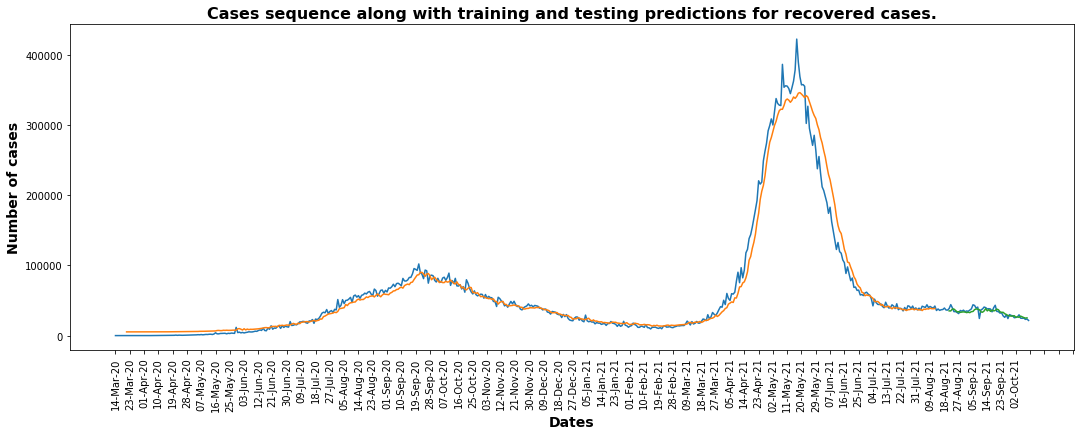

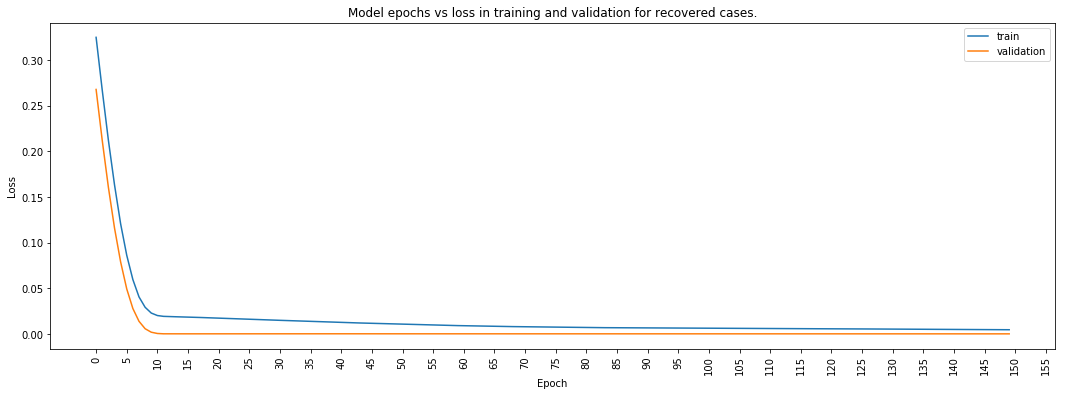

In [8]:
# Change conf to any other and column name as per requirement.
dataframe = rec_df['TT']   # Only change the TT to as per state, 
#and rest everything will work. So only one change and rest of the program is done.

#print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = dataset[:,np.newaxis]

scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.90) # train test split
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
look_back = 7 # 7 was used; This is hyperparameter *1 is optimal 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(7, input_shape=(1, look_back))) # neurons increased now!
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=150, batch_size=64, verbose=2, validation_split=0.10)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# calculate Mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

# calculate bias
forecast_errors = [trainY[i] - trainPredict[i, 0] for i in range(len(trainY))]
bias = sum(forecast_errors) * 1.0/len(trainY)
#print('Train Bias: {} '.format(bias))
forecast_errors = [testY[i] - testPredict[i, 0] for i in range(len(testY))]
bias = sum(forecast_errors) * 1.0/len(testY)
#print('Test Bias: {} '.format(bias))

# calculate Root Mean Squared Error
trainScore = mean_squared_log_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSLE' % (trainScore))
testScore = mean_squared_log_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSLE' % (testScore))

# calculate Root Mean Squared Log error
trainScore = math.sqrt(mean_squared_log_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSLE' % (trainScore))
testScore = math.sqrt(mean_squared_log_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSLE' % (testScore))

# calculate Mean absolute error
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(18, 6))
plt.plot(rec_df['Date'], scaler.inverse_transform(dataset) )
plt.plot(rec_df['Date'], trainPredictPlot)
plt.plot(rec_df['Date'], testPredictPlot)
plt.xlabel('Dates', weight='bold', fontsize=14)
plt.ylabel('Number of cases', weight='bold', fontsize=14)
plt.title('Cases sequence along with training and testing predictions for recovered cases.', weight='bold', fontsize=16)
plt.xticks(np.arange(0, len(trainPredictPlot)+30, 9), rotation='vertical')
plt.show()
from matplotlib import pyplot
pyplot.figure(figsize=(18, 6))
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model epochs vs loss in training and validation for recovered cases.')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
plt.xticks(np.arange(0, len(history.history['loss'])+10, 5), rotation='vertical')
#plt.yticks([dataframe.min(), dataframe.max])
pyplot.show()

# deceased cases

In [ ]:
# Change conf to any other and column name as per requirement.
dataframe = dec_df['TT']   # Only change the TT to as per state, 
#and rest everything will work. So only one change and rest of the program is done.

#print(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = dataset[:,np.newaxis]

scaler = MinMaxScaler(feature_range=(-1, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.90) # train test split
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
look_back = 7 # 7 was used; This is hyperparameter *1 is optimal 
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
model = Sequential()
model.add(LSTM(7, input_shape=(1, look_back))) # neurons increased now!
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, epochs=150, batch_size=64, verbose=2, validation_split=0.10)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# calculate Mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

# calculate bias
forecast_errors = [trainY[i] - trainPredict[i, 0] for i in range(len(trainY))]
bias = sum(forecast_errors) * 1.0/len(trainY)
#print('Train Bias: {} '.format(bias))
forecast_errors = [testY[i] - testPredict[i, 0] for i in range(len(testY))]
bias = sum(forecast_errors) * 1.0/len(testY)
#print('Test Bias: {} '.format(bias))

# calculate Root Mean Squared Error
trainScore = mean_squared_log_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSLE' % (trainScore))
testScore = mean_squared_log_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSLE' % (testScore))

# calculate Root Mean Squared Log error
trainScore = math.sqrt(mean_squared_log_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSLE' % (trainScore))
testScore = math.sqrt(mean_squared_log_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSLE' % (testScore))

# calculate Mean absolute error
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(18, 6))
plt.plot(dec_df['Date'], scaler.inverse_transform(dataset) )
plt.plot(dec_df['Date'], trainPredictPlot)
plt.plot(dec_df['Date'], testPredictPlot)
plt.xlabel('Dates', weight='bold', fontsize=14)
plt.ylabel('Number of cases', weight='bold', fontsize=14)
plt.title('Cases sequence along with training and testing predictions for deceased cases.', weight='bold', fontsize=16)
plt.xticks(np.arange(0, len(trainPredictPlot)+30, 9), rotation='vertical')
plt.show()
from matplotlib import pyplot
pyplot.figure(figsize=(18, 6))
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model epochs vs loss in training and validation for deceased cases.')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
plt.xticks(np.arange(0, len(history.history['loss'])+10, 5), rotation='vertical')
#plt.yticks([dataframe.min(), dataframe.max])
pyplot.show()

518 58
Epoch 1/150
